# Pregunta 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Load the dataset
flights = pd.read_csv('dataset_SCL.csv')
flights["Fecha-I"] = pd.to_datetime(flights["Fecha-I"])
flights["Fecha-O"] = pd.to_datetime(flights["Fecha-O"])

# Check the data types of the columns
print(flights.dtypes)

# Get summary statistics of the numerical variables
print(flights.describe())

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object
                             Fecha-I                        Fecha-O   
count                          68206                          68206  \
mean   2017-07-05 12:11:25.320059648  2017-07-05 12:20:31.971380992   
min              2017-01-01 00:15:00            2017-01-01 00:04:00   
25%              2017-03-31 12:41:15            2017-03-31 12:51:15   
50%              2017-07-10 05:30:00            2017-07-10 05:37:00   
75%              2017-10-08 11:18:45            2017-10-

/tmp/ipykernel_26098/3477621114.py:11: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('dataset_SCL.csv')


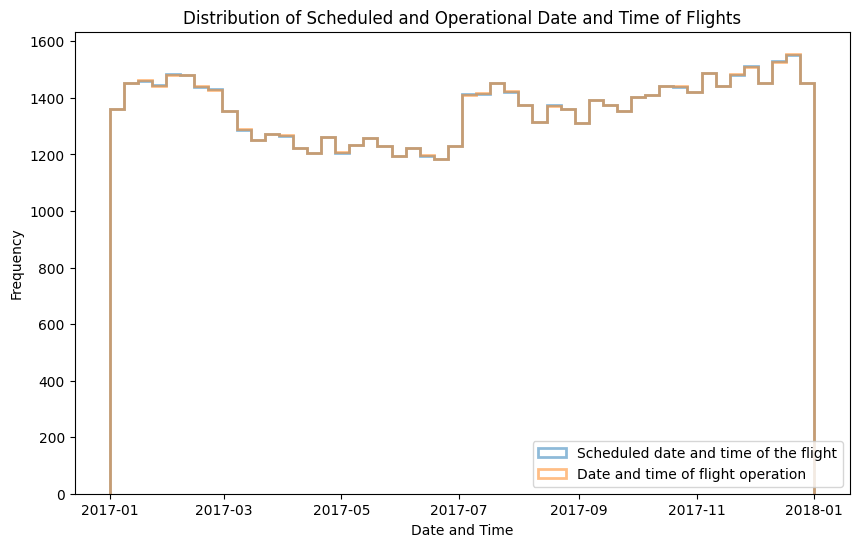

In [2]:
# Plot histograms for "Fecha-I" and "Fecha-O"
plt.figure(figsize=(10, 6))
plt.hist(flights["Fecha-I"], bins=50, alpha=0.5, label="Scheduled date and time of the flight",histtype='step', linewidth=2)
plt.hist(flights["Fecha-O"], bins=50, alpha=0.5, label="Date and time of flight operation",histtype='step', linewidth=2)
plt.legend(loc="lower right")
plt.title("Distribution of Scheduled and Operational Date and Time of Flights")
plt.xlabel("Date and Time")
plt.ylabel("Frequency")
plt.show()


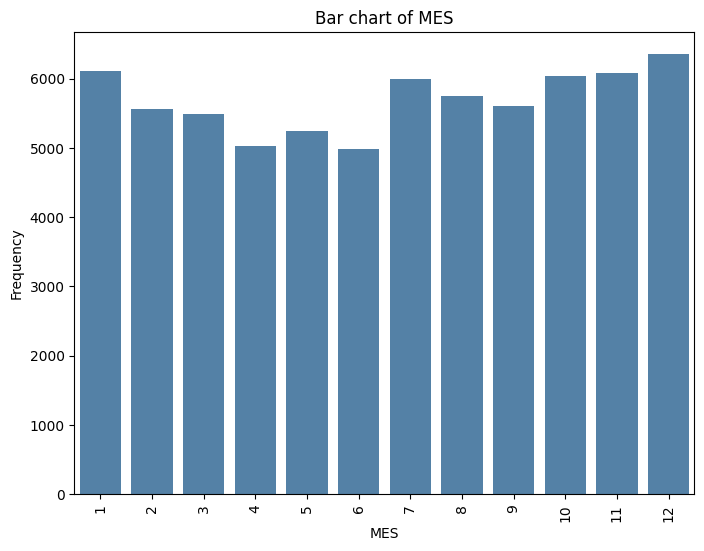

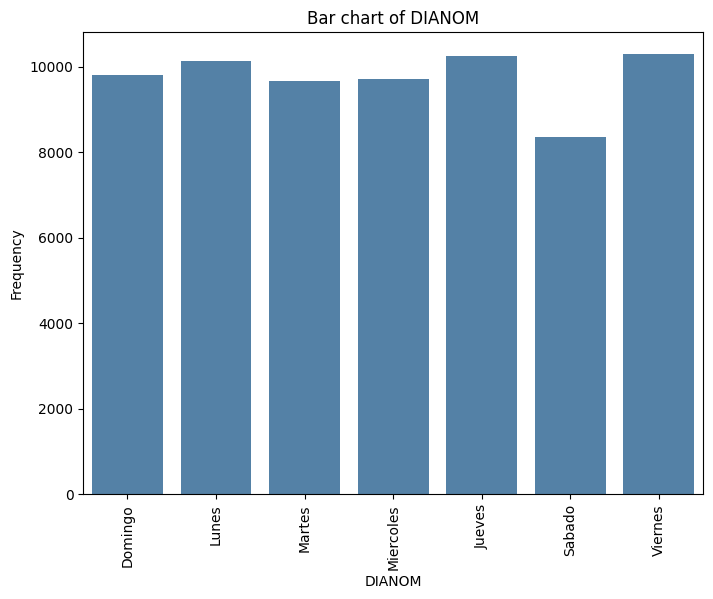

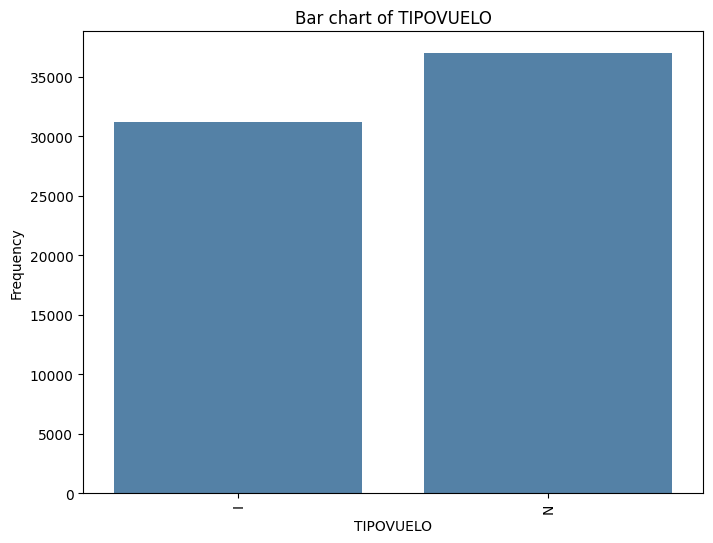

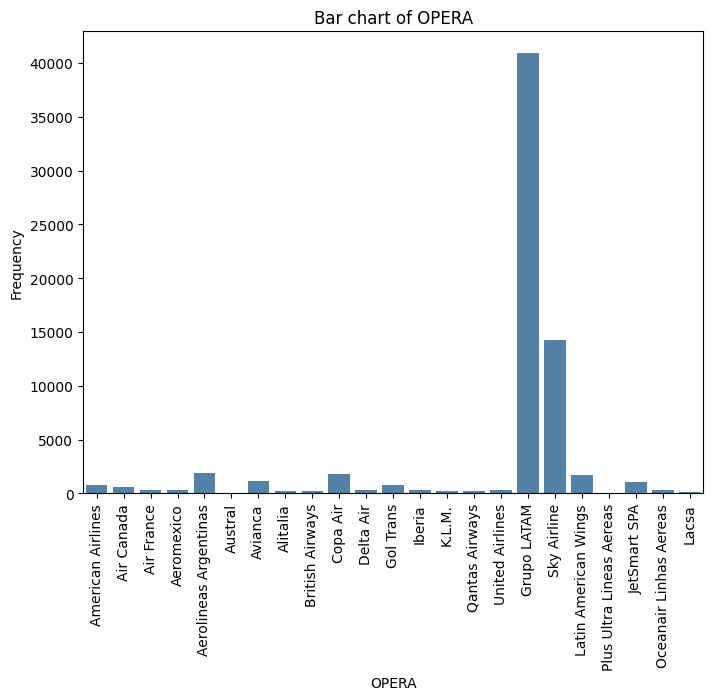

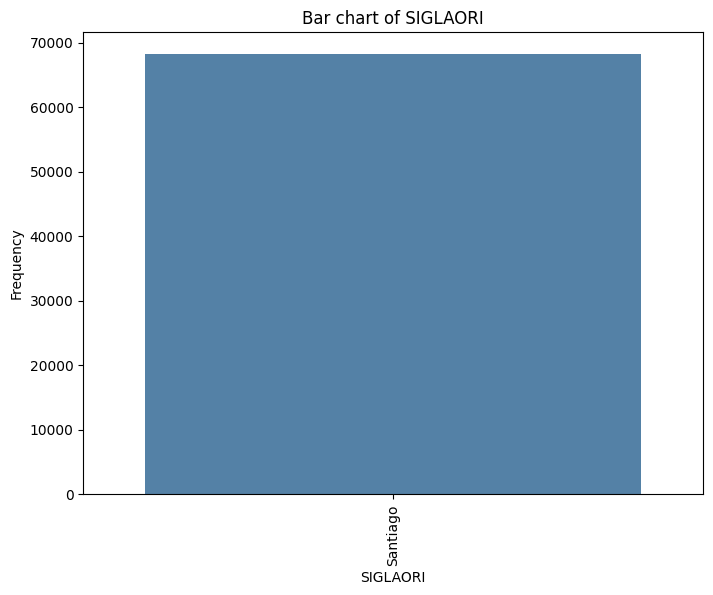

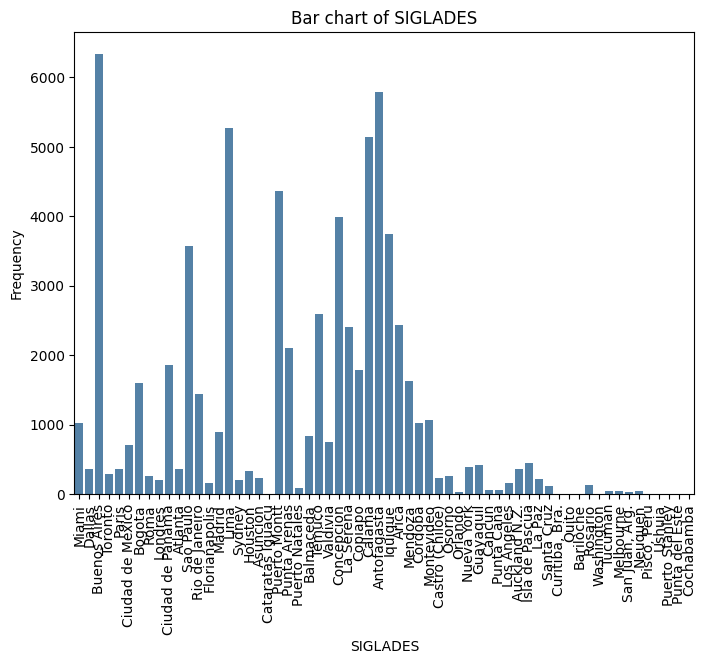

In [3]:
# Plot bar charts of the categorical variables
cat_cols = ['MES','DIANOM','TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES']
for col in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=flights, color='steelblue')
    plt.title(f'Bar chart of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.show()

Con los gráficos generados podemos analizar los datos para las distintas variables:
- Los datos están distribuidos de manera relativamente uniforme en lo que respecta a la fecha de operación, con una mayor frecuencia en los meses de fin y principio de años que en los meses de invierno del hemisferio sur (mediados de año)
- Todos los vuelon operan desde el Aeropuerto de SAntiago, con la aerolínea que mas vuelos opera siendo por lejoss del grupo LAtam, seguido de Sky Airlines.
- Existen levemente más frecuencia de vuelos internacionales que nacionales.
- El sábado es notoriamente el día con menos vuelos.
- La mayor frecuencia de vuelos fue a Buenos Aires, seguido de Antofagasta, Lima y Calama, en ese orden.

# Pregunta 2

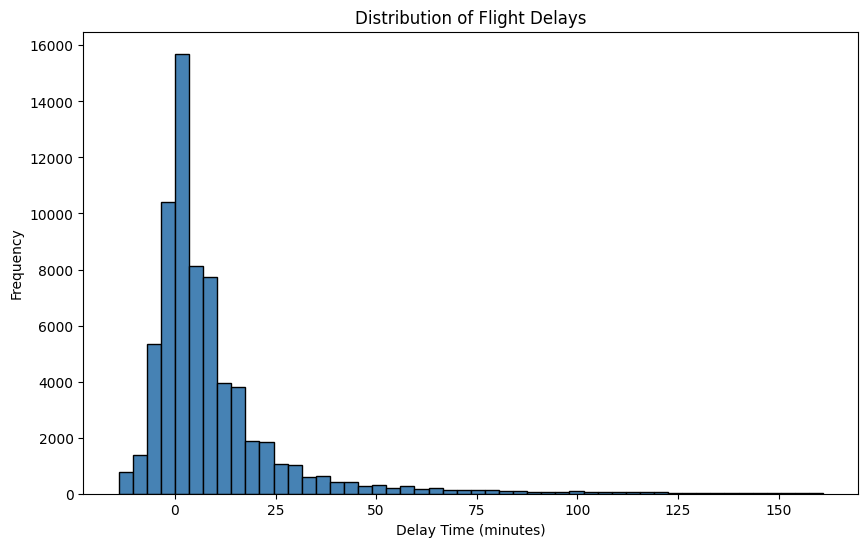

In [4]:
# Calculate the delay time in minutes as the difference between "Fecha-O" and "Fecha-I"
flights["Delay"] = (flights["Fecha-O"] - flights["Fecha-I"]).dt.total_seconds() / 60

# Plot a histogram for the delay time
plt.figure(figsize=(10, 6))
plt.hist(flights["Delay"], bins=50, color="steelblue", edgecolor="black")
plt.title("Distribution of Flight Delays")
plt.xlabel("Delay Time (minutes)")
plt.ylabel("Frequency")
plt.show()

In [5]:
# Create "high_season" column
flights["high_season"] = ((flights["Fecha-I"].dt.month == 12) & (flights["Fecha-I"].dt.day >= 15)) | \
                         ((flights["Fecha-I"].dt.month == 1) | (flights["Fecha-I"].dt.month == 2) | \
                          (flights["Fecha-I"].dt.month == 3) | ((flights["Fecha-I"].dt.month == 7) & \
                          (flights["Fecha-I"].dt.day >= 15)) | (flights["Fecha-I"].dt.month == 8) | \
                          (flights["Fecha-I"].dt.month == 9) & (flights["Fecha-I"].dt.day >= 11))
flights["high_season"] = flights["high_season"].astype(int)

# Create "delay_15" column
flights["delay_15"] = (flights["Delay"] > 15).astype(int)

# Create "period_day" column
flights["period_day"] = pd.cut(flights["Fecha-I"].dt.hour, bins=[0, 5, 12, 19, 24], right=False,
                               labels=["night", "morning", "afternoon", "night"],include_lowest=True, 
                               ordered=False)
    
# Export the new dataset with synthetic features to a CSV file
flights.to_csv("synthetic_features.csv", index=False)



# Pregunta 3

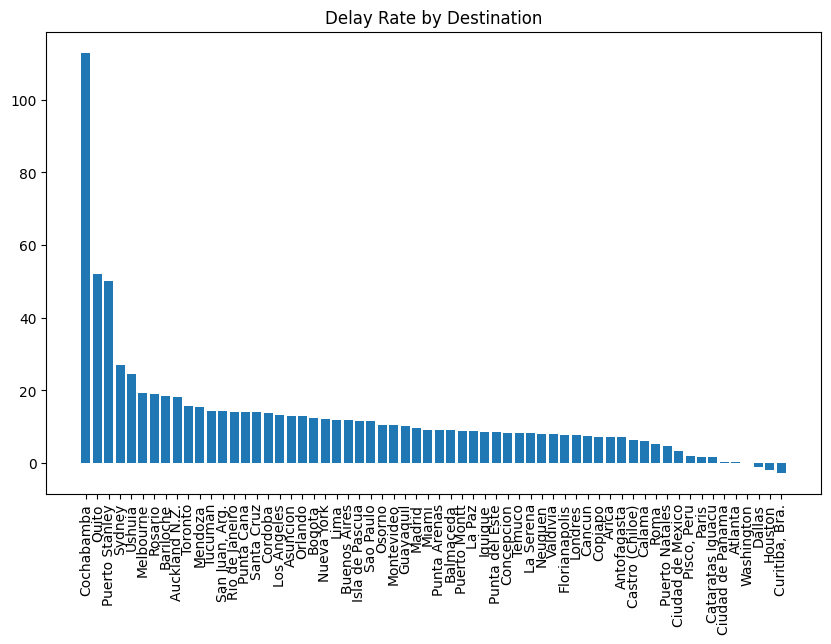

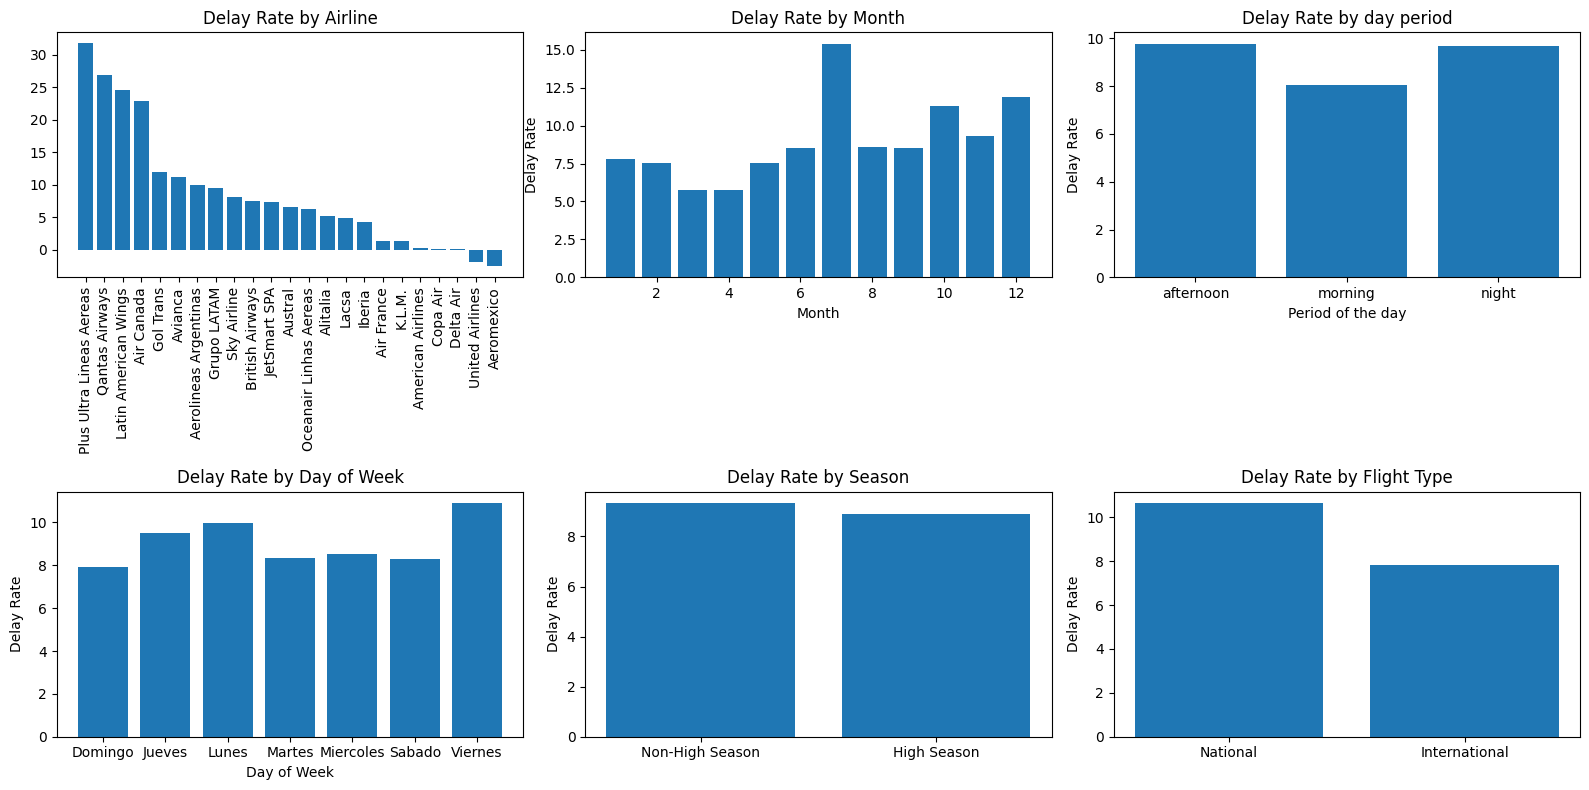

In [12]:
# Calculate delay rate across different categories
delay_by_dest = flights.groupby('SIGLADES')['Delay'].mean().sort_values(ascending=False)
delay_by_airline = flights.groupby('OPERA')['Delay'].mean().sort_values(ascending=False)
delay_by_month = flights.groupby('MES')['Delay'].mean().sort_index()
delay_by_day = flights.groupby('DIANOM')['Delay'].mean().sort_index()
delay_by_season = flights.groupby('high_season')['Delay'].mean()
delay_by_flight_type = flights.groupby('TIPOVUELO')['Delay'].mean()
delay_by_period_day = flights.groupby('period_day')['Delay'].mean()

# Plot the delay rate by destination. because its x axis is bigger
plt.figure(figsize=(10, 6))
plt.bar(delay_by_dest.index, delay_by_dest.values)
plt.title("Delay Rate by Destination")
plt.xticks(rotation=90)
plt.show()


# Plot the delay rate across different categories
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

axs[0,0].bar(delay_by_airline.index, delay_by_airline.values)
axs[0,0].set_title('Delay Rate by Airline')
axs[0,0].tick_params(axis='x', rotation=90)

axs[0,1].bar(delay_by_month.index, delay_by_month.values)
axs[0,1].set_title('Delay Rate by Month')
axs[0,1].set_xlabel('Month')
axs[0,1].set_ylabel('Delay Rate')

axs[0,2].bar(delay_by_period_day.index, delay_by_period_day.values)
axs[0,2].set_title('Delay Rate by day period')
axs[0,2].set_xlabel('Period of the day')
axs[0,2].set_ylabel('Delay Rate')

axs[1,0].bar(delay_by_day.index, delay_by_day.values)
axs[1,0].set_title('Delay Rate by Day of Week')
axs[1,0].set_xlabel('Day of Week')
axs[1,0].set_ylabel('Delay Rate')

axs[1,1].bar(delay_by_season.index, delay_by_season.values)
axs[1,1].set_title('Delay Rate by Season')
axs[1,1].set_xticks([0, 1])
axs[1,1].set_xticklabels(['Non-High Season', 'High Season'])
axs[1,1].set_ylabel('Delay Rate')

axs[1,2].bar(delay_by_flight_type.index, delay_by_flight_type.values)
axs[1,2].set_title('Delay Rate by Flight Type')
axs[1,2].set_xticks([0, 1])
axs[1,2].set_xticklabels(['National', 'International'])
axs[1,2].set_ylabel('Delay Rate')

plt.tight_layout()
plt.show()


We can obtain several insights from the data extracted. The principal conclusions are:
 - Friday, being the busiest day, also has the biggest delay rate from all the days of the week (however it os only the busiest by a few flights and has the biggest delay by an slightly important rate)
 - Saturday is not the day eith the smallest delay rate, despite being the day with less amount of flights by far.
 - National flights have more than 20% more delay rate than International flights.
 - Plus Ultra Lineas Aereas, QAntas and LAtin MAerican Wings are the airlines with the biggest delay rate, despite not beeing close to having the same amounts of flights than the more busy airlines.
 - Non high season flights have more delay than the high season ones.
 - Cochabamba is by far the destiantion with the highest delay rate.
 - Flights in the morning tend to have less delay

# Pregunta 4

## Random Forest Regression model to predict minutes of delay for each flight

We could try to train a Random Forest Regression model to try to identify how much delay will each flight has

In [61]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

#Differentiate the numerical and categorical cols
numerical_cols=["DIA","MES","high_season"]
categorical_cols = ["DIANOM", "TIPOVUELO", "OPERA", "SIGLADES", "high_season", "period_day"]

# numerical_cols=["high_season"]
# categorical_cols = ["OPERA", "SIGLADES"]


# instantiate OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# select the input features and the target variable
X = flights[["DIA", "MES", "DIANOM", "TIPOVUELO", "OPERA", "SIGLADES", "high_season", "period_day"]]
y = flights["Delay"]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit and transform the ohe training data
X_train_ohe = ohe.fit_transform(X_train[categorical_cols])

# transform the test data using the fitted encoder
X_test_ohe = ohe.transform(X_test[categorical_cols])


X_train_final = np.concatenate([X_train_ohe, X_train[numerical_cols]], axis=1)
X_test_final = np.concatenate([X_test_ohe, X_test[numerical_cols]], axis=1)
#################################OHE#####################################


/home/jpmena/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
# create a Random Forest regression object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model using the training data
rf.fit(X_train_final, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test_final)

# evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.14476514116518746


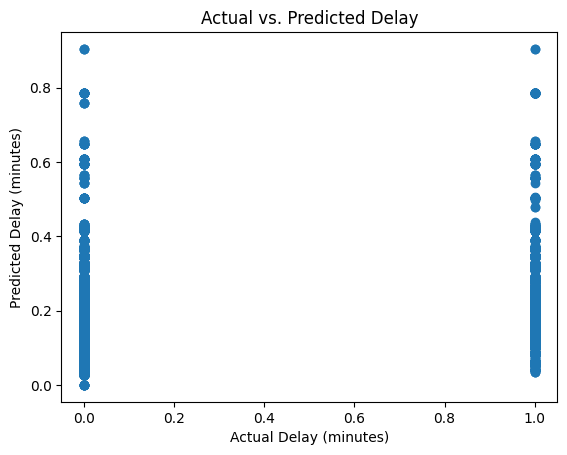

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("Actual vs. Predicted Delay")
plt.show()

However, we see that if we do that the mean square error is really high, and it's clear in the plot that the model is not working. Even if we try to change the input columns of the model the result is pretty much the same. 


## Random forest classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model using the training data
rfc.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     16636
           1       0.62      0.04      0.07      3826

    accuracy                           0.82     20462
   macro avg       0.72      0.52      0.48     20462
weighted avg       0.78      0.82      0.74     20462



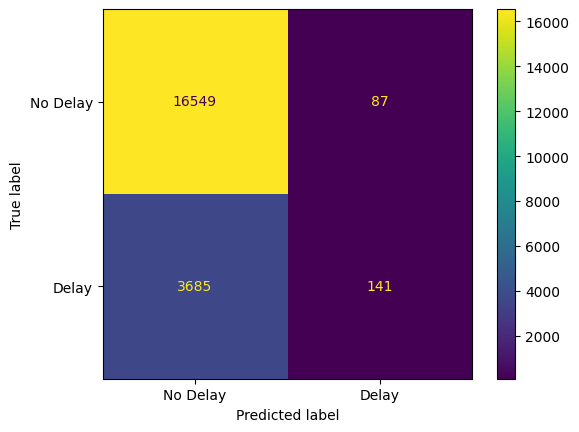

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print results
print('Confusion matrix:\n', conf_mat)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)
print('AUC:', roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the flights dataset
df = pd.read_csv("flights.csv")

# Binarize the delay column
df["Delay"] = (df["Delay"] > 0).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Delay", axis=1), df["Delay"], test_size=0.2, random_state=42)

# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train, columns=["DIANOM", "TIPOVUELO", "OPERA", "SIGLAORI", "SIGLADES", "MES", "period_day"])
X_test_encoded = pd.get_dummies(X_test, columns=["DIANOM", "TIPOVUELO", "OPERA", "SIGLAORI", "SIGLADES", "MES", "period_day"])

# Train the logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test_encoded)

# Print the classification report
print(classification_report(y_test, y_pred))